In [1]:
from scipy.io import loadmat
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import cmath
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, concatenate
from tensorflow.python.keras.utils.vis_utils import plot_model
import pandas as pd


In [2]:
drive.mount('/content/drive')
data = loadmat('/content/drive/MyDrive/dataset1.mat')

Mounted at /content/drive


In [3]:
# Preparing the data

rec_d = data['receivedSignal4N']
tra_d = data['transmitSignal']
irs = data['pilotMatrix4N']
x1 = tra_d
x2 = irs
y = rec_d
M, N4 = x2.shape
K, N4 = y.shape
#nt = rec_d.shape[1] - N4

In [5]:
temp = np.zeros((K,N4))
for i in range(N4):
  for j in range(K):
    temp[j,i] = temp[j,i] + x1[j]


In [9]:
X_transmit = temp
X_IRS = x2
Y = y
X_transmit_ph = np.zeros(X_transmit.shape)
Y_ph = np.zeros(Y.shape)
fun = np.vectorize(cmath.phase)
for i in range(N4):
  X_transmit_ph[:,i] = fun(X_transmit[:,i])
  Y_ph[:,i] = fun(Y[:,i])
X_transmit_amp = abs(X_transmit)
Y_amp = abs(Y)

In [10]:
print(Y[0,0],Y_ph[0,0],Y_amp[0,0])

(2.435141772513321e-10+5.003045371322946e-10j) 1.1178194280442926 5.564205104033754e-10


In [12]:
# define two sets of inputs
inputA = Input(shape=500)
inputB = Input(shape=4096)
# the first branch operates on the first input
x = Dense(512, activation="relu")(inputA)
x = Dense(1024, activation="relu")(x)
x = Dense(500, activation = "relu")(x)
x = Model(inputs=inputA, outputs=x)
# the second branch opreates on the second input
y = Dense(1024, activation="relu")(inputB)
y = Dense(512, activation="relu")(y)
y = Dense(500, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)
# combine the output of the two branches
combined = concatenate([x.output, y.output])
# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(512, activation="relu")(combined)
z = Dense(500, activation="linear")(z)
# our model will accept the inputs of the two branches and
# then output a single value
model = Model(inputs=[x.input, y.input], outputs=z)


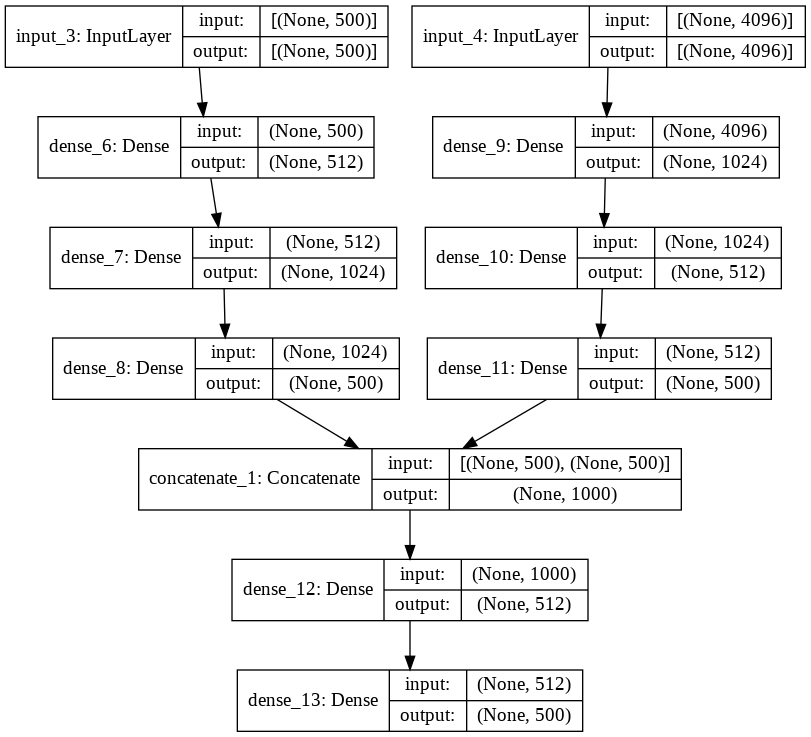

In [13]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.fit([(X_transmit_amp).reshape(-1, 500), X_IRS.reshape(-1, 4096)], (Y_amp*(10 ** 5)).reshape(-1, 500), epochs=5)
model.fit([(X_transmit_ph).reshape(-1, 500), X_IRS.reshape(-1, 4096)], Y_ph.reshape(-1, 500), epochs=5)

Epoch 1/5
512/512 [==============================] - 32s 62ms/step - loss: 21.1549 - accuracy: 0.0017
Epoch 2/5
512/512 [==============================] - 31s 61ms/step - loss: 66.6766 - accuracy: 0.0043
Epoch 3/5
512/512 [==============================] - 31s 60ms/step - loss: -2.1314 - accuracy: 0.0027
Epoch 4/5
512/512 [==============================] - 31s 61ms/step - loss: -143.4972 - accuracy: 6.2706e-04
Epoch 5/5
512/512 [==============================] - 32s 62ms/step - loss: -166.8865 - accuracy: 0.0028
